In [ ]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Reading
#df01 = pd.read_csv("MasterFile_6-1-23.csv", index_col=0)
dfML = pd.read_csv("MasterFile_6-1-23.csv" )





# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 
import seaborn as sns 
sns.set_style('darkgrid')
from matplotlib import style
%matplotlib inline


from statistics import mean

%pip install scikit-learn  --upgrade --force
%pip install xgboost
%pip install lightgbm



# ML 
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold)

import lightgbm as lgb



In [2]:
dfML

,Year_Obv,States,DB_Values,DB_Low,DB_High,OB_Values,OB_Low,OB_High,HD_Values,HD_Low,HD_High,HC_Values,HC_Low,HC_High,HBP_Values,HBP_Low,HBP_High,TargetStroke
0,2017Tracts1,AK1,7.4,6.9,7.8,36.3,35.0,37.6,4.2,3.9,4.6,32.3,31.1,33.4,32.3,30.7,34.0,2.2
1,2017Tracts2,AK2,8.9,8.3,9.6,33.5,32.1,34.7,4.7,4.5,5.0,33.0,32.4,33.6,28.3,26.8,29.8,2.2
2,2017Tracts3,AK3,8.2,7.8,8.6,39.0,38.2,39.8,5.8,5.2,6.4,31.9,31.3,32.4,33.8,32.4,35.1,2.2
3,2017Tracts4,AK4,6.1,5.4,6.8,33.4,32.0,34.8,4.4,4.1,4.8,29.3,28.5,30.2,27.4,26.7,28.1,2.2
4,2017Tracts5,AK5,7.3,6.7,7.9,33.2,31.5,34.6,4.0,3.6,4.4,31.4,30.6,32.2,33.0,32.4,33.6,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27999,2017Tracts28000,WY28000,9.0,8.2,9.9,28.9,27.6,30.3,3.3,2.9,3.6,29.4,28.6,30.1,20.8,20.0,21.7,2.8
28000,2017Tracts28001,WY28001,7.4,6.9,7.9,29.7,28.4,31.0,4.9,4.4,5.4,30.8,29.8,31.9,32.5,31.0,34.0,3.2
28001,2017Tracts28002,WY28002,8.9,8.1,9.7,28.4,26.9,29.8,6.7,5.9,7.5,32.9,31.9,33.9,31.3,30.1,32.6,3.0
28002,2017Tracts28003,WY28003,9.1,8.3,9.9,27.2,26.0,28.4,5.2,4.7,5.7,31.6,30.7,32.5,31.9,30.7,33.1,2.3


Building an isolation Forest Model to visualize outliers.

### Cal. each quantile to visulize the upper and lower quantiles.


In [3]:
q01 = dfML['DB_Values'] .quantile(0.90)
q02 = dfML['DB_Values'] .quantile(0.01)
q03 = dfML['DB_Low'] .quantile(0.90)
q04 =  dfML['DB_Low'] .quantile(0.01)
q05 = dfML['DB_High'] .quantile(0.90)
q06 = dfML['DB_High'] .quantile(0.01)

q07 =  dfML['OB_Values'] .quantile(0.95)
q08 =  dfML['OB_Values'] .quantile(0.01)
q09 =  dfML['OB_Low'] .quantile(0.95)
q10 =  dfML['OB_Low'] .quantile(0.01)
q11 =  dfML['OB_High'] .quantile(0.95)
q12 =  dfML['OB_High'] .quantile(0.01)


q13 =  dfML['HC_Values'] .quantile(0.95)
q14 =  dfML['HC_Values'] .quantile(0.2)
q15 =  dfML['HC_Low'] .quantile(0.95)
q16 =  dfML['HC_Low'] .quantile(0.02)
q17 =  dfML['HC_High'] .quantile(0.95)
q18 =  dfML['HC_High'] .quantile(0.02)


q19 =  dfML['HD_Values'] .quantile(0.90)
q20 =  dfML['HD_Values'] .quantile(0.01)
q21 = dfML['HD_Low'] .quantile(0.90)
q22 =  dfML['HD_Low'] .quantile(0.01)
q23 =  dfML['HD_High'] .quantile(0.90)
q24 =  dfML['HD_High'] .quantile(0.01)

q25 =  dfML['HBP_Values'] .quantile(0.90)
q26 = dfML['HBP_Values'] .quantile(0.02)
q27 =  dfML['HBP_Low'] .quantile(0.89)
q28 =  dfML['HBP_Low'] .quantile(0.02)
q29 =  dfML['HBP_High'] .quantile(0.89)
q30 = dfML['HBP_High'] .quantile(0.02)

q31 = dfML['TargetStroke'].quantile(0.77)
q32 = dfML['TargetStroke'].quantile(0.04)
#q31 = dfML['TargetStroke'].quantile(0.77)
#q32 = dfML['TargetStroke'].quantile(0.03)

In [4]:
print(q31)
print(q32)

3.5
1.5


### Extacting and Trimming the outliers

In [5]:
df = dfML[(dfML['DB_Values'] >=q02 ) & (dfML['DB_Values'] <= q01) &
        (dfML['DB_Low'] >= q04) & (dfML['DB_Low'] <= q03) & 
        (dfML['DB_High'] >= q06) &  (dfML['DB_High'] <= q05) &
        (dfML['OB_Values'] >= q08) &  (dfML['OB_Values'] <= q07) &
        (dfML['OB_Low'] >= q10) &  (dfML['OB_Low'] <= q09) &
        (dfML['OB_High'] >= q12) & (dfML['OB_High'] <= q11) &
        (dfML['HC_Values'] >= q14) & (dfML['HC_Values'] <= q13) &
        (dfML['HC_Low'] >= q16) & (dfML['HC_Low'] <= q15) &
        (dfML['HC_High'] >= q18) & (dfML['HC_High'] <= q17) &
        (dfML['HD_Values'] >= q20) & (dfML['HD_Values'] <= q19) &
        (dfML['HD_Low'] >= q22) & (dfML['HD_Low'] <= q21) &
        (dfML['HD_High'] >= q24) & (dfML['HD_High'] <= q23) & 
        (dfML['HBP_Values'] >= q26) & (dfML['HBP_Values'] <= q25) &
        (dfML['HBP_Low'] >= q28) & (dfML['HBP_Low'] <=q27) & 
        (dfML['HBP_High'] >= q30) & (dfML['HBP_High'] <= q29) &
        (dfML['TargetStroke'] >= q32) & (dfML['TargetStroke'] <=q31) ]


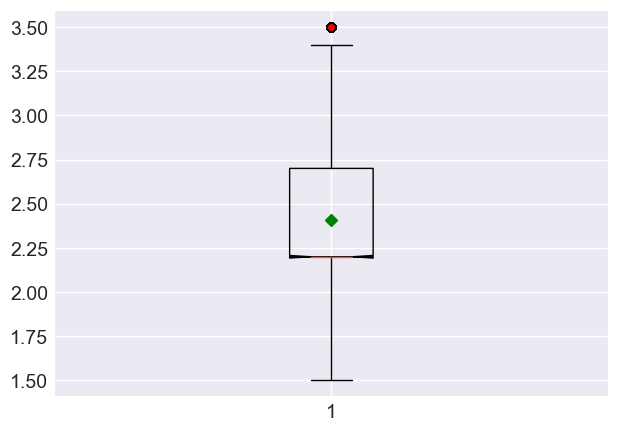

In [6]:
red_circle = dict(markerfacecolor='red', marker='o') ## outliers
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green') ## 

plt.boxplot(x=df['TargetStroke'], vert=True, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True);

In [7]:
df.columns

Index(['Year_Obv', 'States', 'DB_Values', 'DB_Low', 'DB_High', 'OB_Values',
       'OB_Low', 'OB_High', 'HD_Values', 'HD_Low', 'HD_High', 'HC_Values',
       'HC_Low', 'HC_High', 'HBP_Values', 'HBP_Low', 'HBP_High',
       'TargetStroke'],
      dtype='object')

In [8]:
# dropping for pairplot visualization below only - not for other parameters.
df_Dp = df.drop(columns=['Year_Obv','States','TargetStroke'])
dfML_01 = df_Dp.rename(columns={'DB_Values':'DB', 'DB_Low':'DBLo', 'DB_High':'DBHx', 'OB_Values':'OB', 'OB_Low':'OBLo', 'OB_High':'OBHx',  'HC_Values':'HC', 'HC_Low':'HCLo',  'HC_High':'HCHx',  'HD_Values':'HD',   'HD_Low':'HDLo',  'HD_High':'HDHx', 'HBP_Values':'HBP', 'HBP_Low':'HBPLo','HBP_High':'HBPHx','TargetStroke':'Target' })

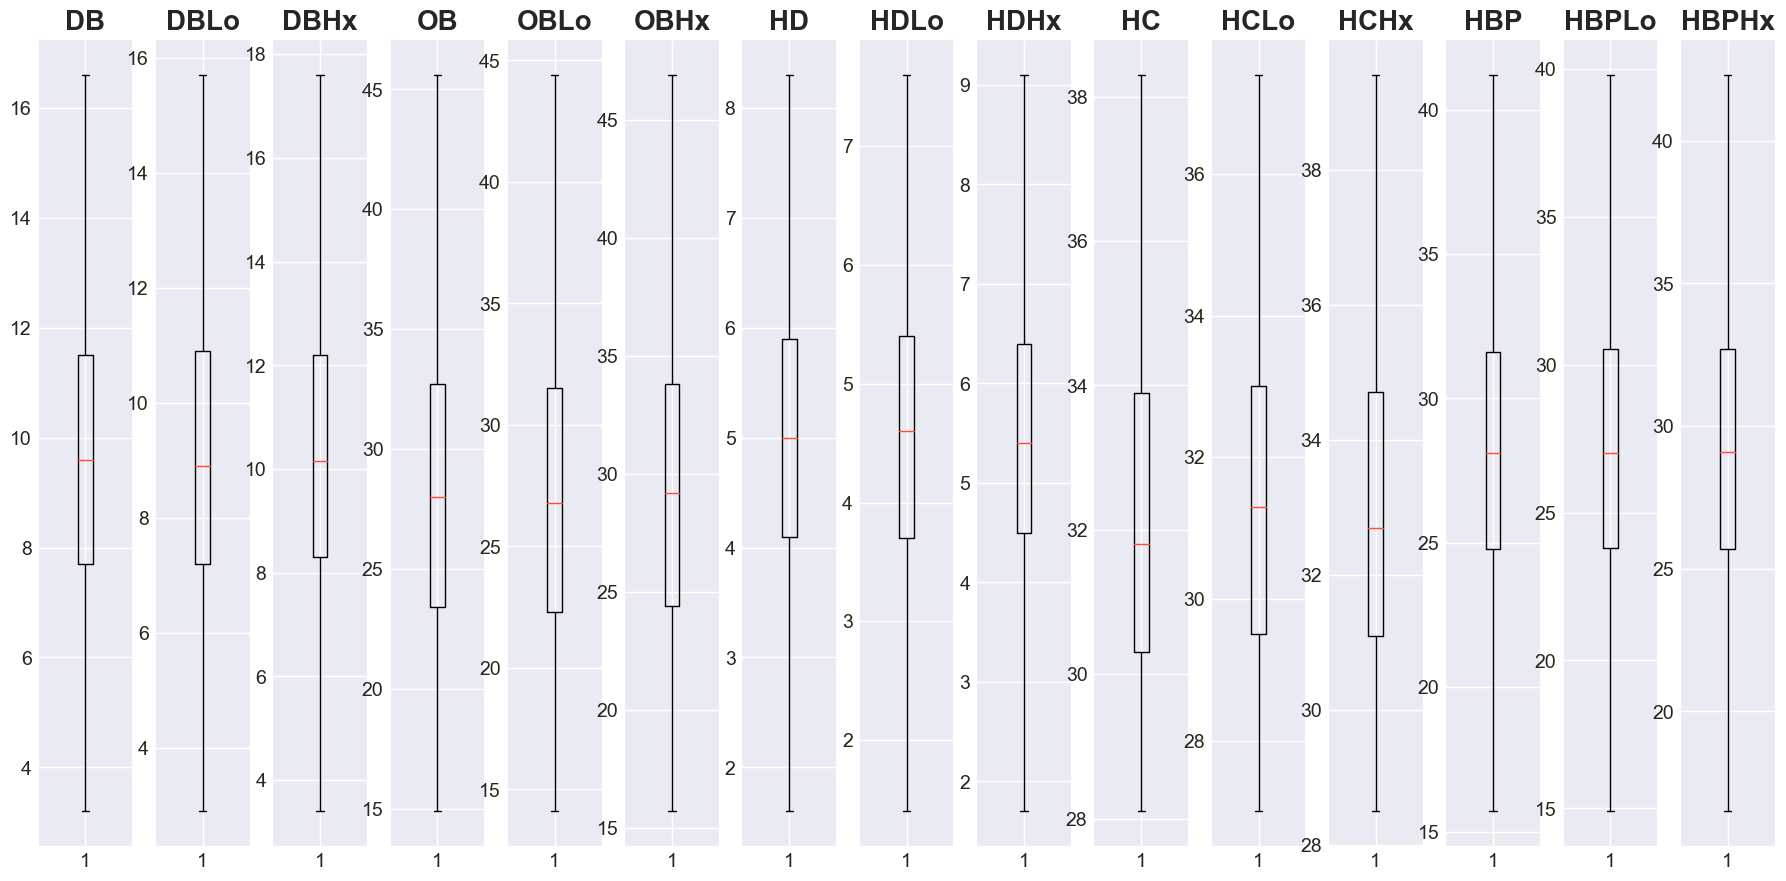

In [9]:
#Subplot

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(dfML_01.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(dfML_01.iloc[:,i], flierprops=red_circle) # exclude row#0 and #1
    ax.set_title(dfML_01.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()

### ML dataframe without outliers. 

In [10]:
df_Dp

,DB_Values,DB_Low,DB_High,OB_Values,OB_Low,OB_High,HD_Values,HD_Low,HD_High,HC_Values,HC_Low,HC_High,HBP_Values,HBP_Low,HBP_High
0,7.4,6.9,7.8,36.3,35.0,37.6,4.2,3.9,4.6,32.3,31.1,33.4,32.3,30.7,34.0
1,8.9,8.3,9.6,33.5,32.1,34.7,4.7,4.5,5.0,33.0,32.4,33.6,28.3,26.8,29.8
2,8.2,7.8,8.6,39.0,38.2,39.8,5.8,5.2,6.4,31.9,31.3,32.4,33.8,32.4,35.1
3,6.1,5.4,6.8,33.4,32.0,34.8,4.4,4.1,4.8,29.3,28.5,30.2,27.4,26.7,28.1
4,7.3,6.7,7.9,33.2,31.5,34.6,4.0,3.6,4.4,31.4,30.6,32.2,33.0,32.4,33.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27999,9.0,8.2,9.9,28.9,27.6,30.3,3.3,2.9,3.6,29.4,28.6,30.1,20.8,20.0,21.7
28000,7.4,6.9,7.9,29.7,28.4,31.0,4.9,4.4,5.4,30.8,29.8,31.9,32.5,31.0,34.0
28001,8.9,8.1,9.7,28.4,26.9,29.8,6.7,5.9,7.5,32.9,31.9,33.9,31.3,30.1,32.6
28002,9.1,8.3,9.9,27.2,26.0,28.4,5.2,4.7,5.7,31.6,30.7,32.5,31.9,30.7,33.1


ML without  Outliers

ML - Linear Regression without Outliers.

Test train split for supervised training.
Using the testing portion to predict how well the model perform

In [11]:
X= df_Dp
y= df['TargetStroke']  # dependent feature (Stroke).
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [12]:

# Fit/load into a model
modelReg = LinearRegression ()
modelReg.fit(X_train,y_train)


LinearRegression()

In [13]:
#=========================================
score_train = modelReg.predict(X_train)
y_pred = modelReg.predict(X_test) 


In [14]:
print(modelReg.score(X_test,y_test))
#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error


0.03037259044676044
Score 0.03037259044676044
r2:-17.67544927162349  
MAE =  0.3250305421143962
MAPE =  0.13406195906960497


XGBRegressor ML Model without Outliers.

In [15]:
pip install xgboost


In [16]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor
modelXGB= XGBRegressor()
modelXGB.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [17]:
#=========================================
score_train = modelXGB.predict(X_train)
y_pred = modelXGB.predict(X_test)

In [18]:
print(modelXGB.score(X_test,y_test))
print('Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

-0.08016950123334565
Score -0.08016950123334565
r2:-4.5773577175158255  
MAE =  0.33252904791135035
MAPE =  0.13649507627611954


Decision Tree without Outliers.

In [19]:

modelDT= DecisionTreeRegressor()
modelDT.fit(X_train,y_train)


DecisionTreeRegressor()

In [20]:
#=========================================
score_train = modelDT.predict(X_train)
y_pred = modelDT.predict(X_test) 

In [21]:
print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE= ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error



Score -0.9064809775286986
r2:-0.7339347171439929  
MAE=  0.4222123500666371
MAPE =  0.17389180717921118


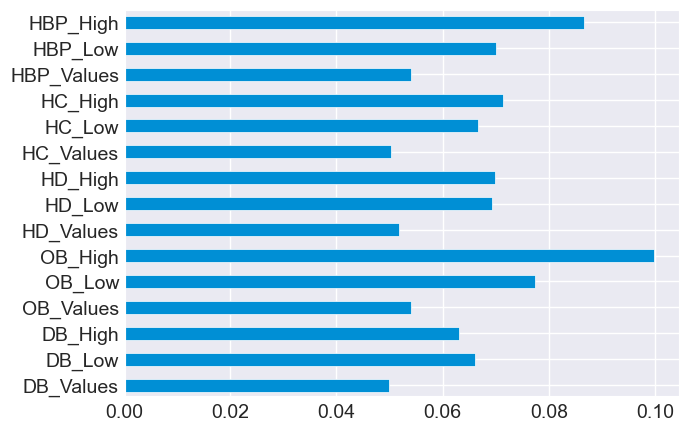

In [22]:
model_ranks=pd.Series(modelDT.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

RandomForestRegressor without Outliers.

In [23]:

modelRF = RandomForestRegressor(n_estimators=20, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
modelRF.fit(X_train,y_train)


RandomForestRegressor(n_estimators=20, random_state=1)

In [24]:
#=========================================
score_train = modelRF.predict(X_train)
y_pred = modelRF.predict(X_test)

In [25]:
print('Score', r2_score(y_test,y_pred))
print("r2:{}  ".format(r2_score(y_pred,y_test)))  
#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error
print('MSE', mean_squared_error(y_test,y_pred))


Score -0.03783630813284944
r2:-6.057953286071251  
MAE =  0.3281541537094625
MAPE =  0.13450746311588024
MSE 0.18809776765881825


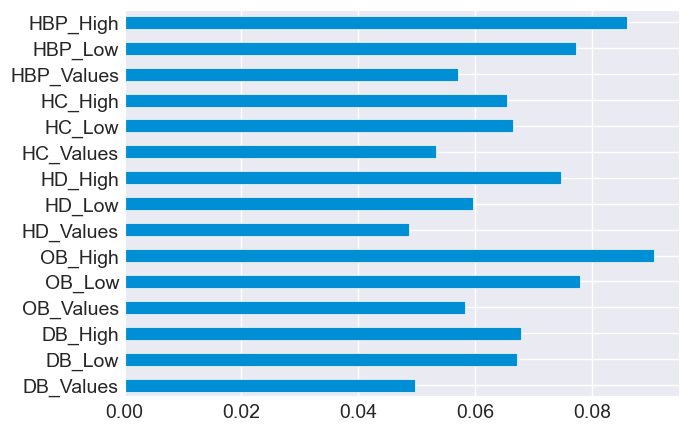

In [26]:
model_ranks=pd.Series(modelRF.feature_importances_,index=X_train.columns,name='Importance')
ax=model_ranks.plot(kind='barh')

ML with outliers 

In [27]:
# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 

import seaborn as sns 
sns.set_style('darkgrid')

%matplotlib inline

%pip install scikit-learn  --upgrade --force
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Reading

dfML_OL = pd.read_csv("MasterFile_6-1-23.csv" )




# !pip install openpyxl  
import os
import pandas as pd 
import numpy as np 
import matplotlib.pylab as plt
import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight') 
import seaborn as sns 
sns.set_style('darkgrid')
from matplotlib import style
%matplotlib inline


from statistics import mean

%pip install scikit-learn  --upgrade --force
%pip install xgboost
%pip install lightgbm



# ML 
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold)

import lightgbm as lgb



  Using cached scikit_learn-1.3.0-cp311-cp311-win_amd64.whl (9.2 MB)
  Using cached numpy-1.25.1-cp311-cp311-win_amd64.whl (15.0 MB)
  Using cached scipy-1.11.1-cp311-cp311-win_amd64.whl (44.0 MB)
  Using cached joblib-1.3.1-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.2.0
    Uninstalling threadpoolctl-3.2.0:
      Successfully uninstalled threadpoolctl-3.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.1
    Uninstalling joblib-1.3.1:
      Successfully uninstalled joblib-1.3.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
  Attempting uninstall: scikit-learn
    Found existin

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dolly\\AppData\\Local\\r-miniconda\\envs\\datascience-pro-env\\Lib\\site-packages\\~..earn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



  Using cached scikit_learn-1.3.0-cp311-cp311-win_amd64.whl (9.2 MB)
  Using cached numpy-1.25.1-cp311-cp311-win_amd64.whl (15.0 MB)
  Using cached scipy-1.11.1-cp311-cp311-win_amd64.whl (44.0 MB)
  Using cached joblib-1.3.1-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.2.0
    Uninstalling threadpoolctl-3.2.0:
      Successfully uninstalled threadpoolctl-3.2.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.1
    Uninstalling joblib-1.3.1:
      Successfully uninstalled joblib-1.3.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.1
    Uninstalling scipy-1.11.1:
      Successfully uninstalled scipy-1.11.1
  Attempting uninstall: scikit-learn
    Found existing

In [28]:
dfML_OL.columns

Index(['Year_Obv', 'States', 'DB_Values', 'DB_Low', 'DB_High', 'OB_Values',
       'OB_Low', 'OB_High', 'HD_Values', 'HD_Low', 'HD_High', 'HC_Values',
       'HC_Low', 'HC_High', 'HBP_Values', 'HBP_Low', 'HBP_High',
       'TargetStroke'],
      dtype='object')

In [29]:
dfML01 = dfML_OL.drop(columns=['Year_Obv', 'States'])

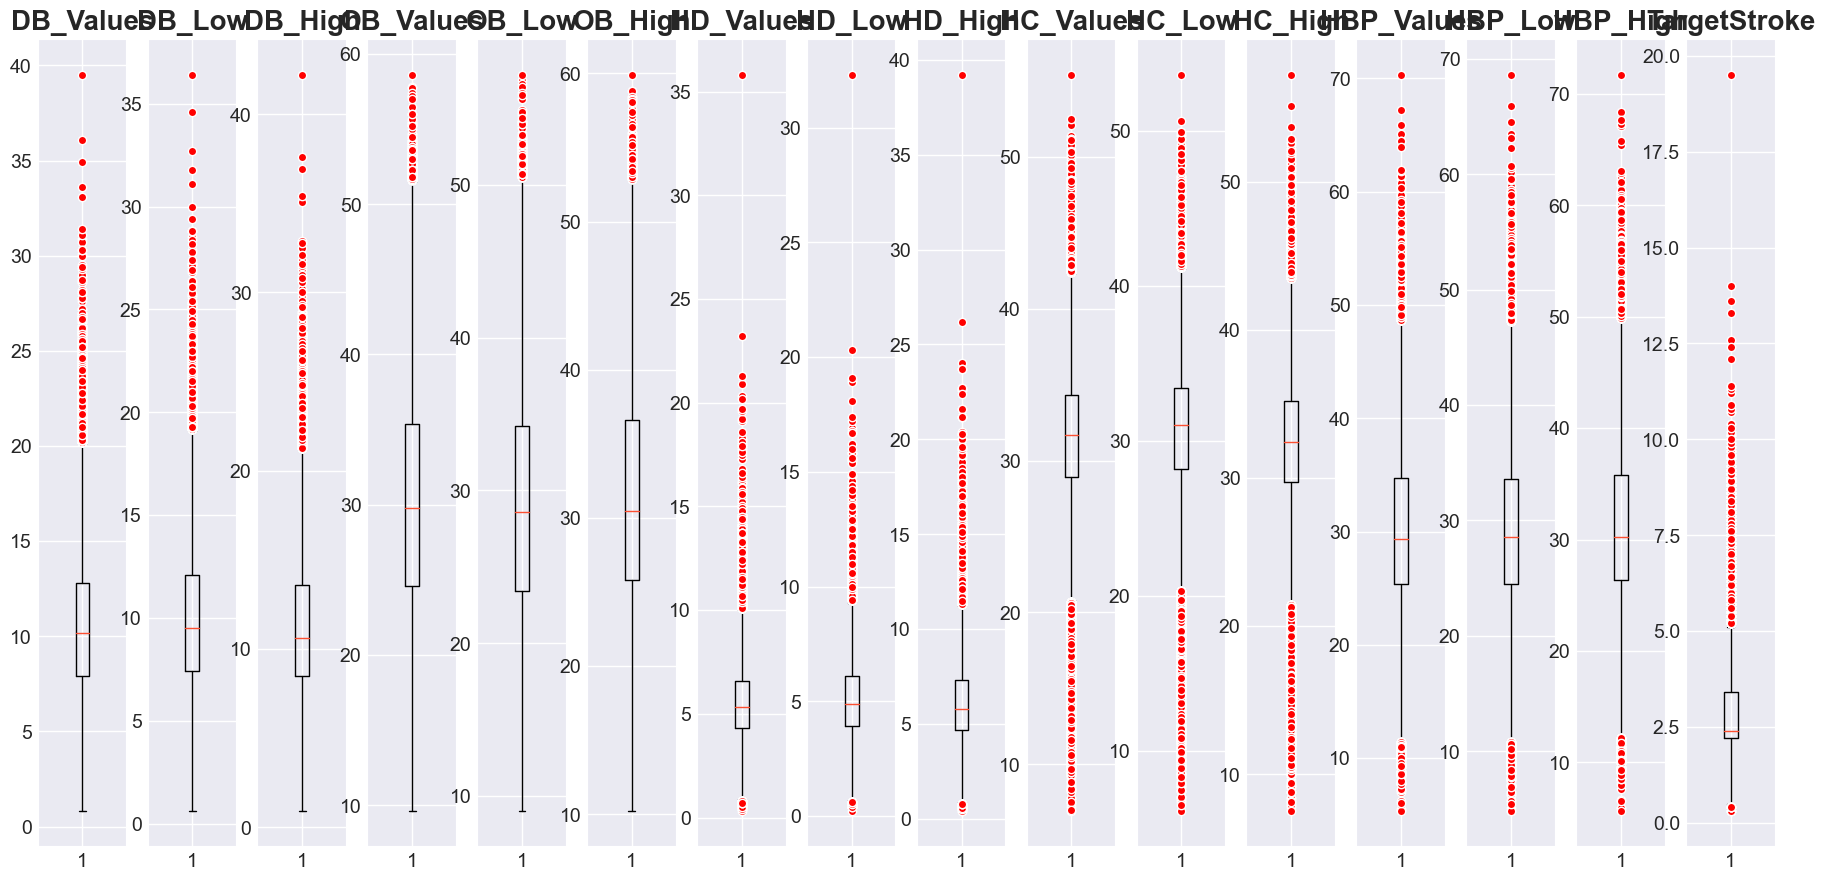

In [30]:
#Subplot

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axs = plt.subplots(1, len(dfML01.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(dfML01.iloc[:,i], flierprops=red_circle) # exclude row#0 and #1
    ax.set_title(dfML01.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.show()

ML with outliers.

In [31]:
X= dfML01.iloc[:, :-1]
y= dfML01.iloc[:, -1] # dependent feature (Stroke).

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

LINEAR REGRESSION ML

In [32]:
# Fit/load into a model - new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
modelReg = LinearRegression ().fit(X_train, y_train)



In [33]:

#Get results - obtain the coefficient of determination, 𝑅², with .score() called on model:
r_sq = modelReg.score(X, y)
print(f"Coefficient of determination: {r_sq}")

print()
print()

print(f"Intercept: {modelReg.intercept_}")
print(f"Slope: {modelReg.coef_}")

print()
print()

#Predict on training set.
score_train = modelReg.predict(X_train)
print(f"Predicted response on training set:\n{score_train}")

print()
print()
#When applying .predict() and pass the regressor as the argument
#the corresponding predicted response. 
y_pred = modelReg.intercept_ + modelReg.coef_ * X
print(f"The corresponding predicted response:\n{y_pred}")

print()


Coefficient of determination: 0.08221199123977596


Intercept: 0.5849955490527279
Slope: [ 0.11452903 -0.10575642  0.00749602 -0.79587726  0.31352352  0.50837945
 -0.09331961  0.13289053  0.02011813 -0.20621699  0.01507246  0.19456434
 -0.36651171  0.16675316  0.21713651]


Predicted response on training set:
[2.84605811 2.91073032 3.19434307 ... 3.26490769 3.00343743 3.01047513]


The corresponding predicted response:
       DB_Values    DB_Low   DB_High  OB_Values     OB_Low    OB_High  \
0       1.432510 -0.144724  0.643464 -28.305349  11.558319  19.700063   
1       1.604304 -0.292783  0.656957 -26.076893  10.649101  18.225762   
2       1.524134 -0.239905  0.649461 -30.454218  12.561594  20.818498   
3       1.283623  0.013911  0.635968 -25.997305  10.617748  18.276600   
4       1.421057 -0.123572  0.644214 -25.838129  10.460986  18.174925   
...          ...       ...       ...        ...        ...        ...   
27999   1.615757 -0.282207  0.659206 -22.415857   9.238245  15.988

In [34]:

#Predict on Testing set.
y_pred = modelReg.predict(X_test)
print('Score = ', modelReg.score(X_test,y_test))

#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('r2 Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

Score =  0.09102972666527498
r2 Score 0.09102972666527498
r2:-10.685163485690063  
MAE =  0.9106689412235824
MAPE =  0.2998762282509406


XGBRegressor ML Model

In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [36]:
from xgboost import XGBRegressor

In [37]:

# Fit/load into a model - new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
modelXGB= XGBRegressor().fit(X_train, y_train)

In [38]:

#Get results - obtain the coefficient of determination, 𝑅², with .score() called on model:
r_sq = modelXGB.score(X, y)
r_sq
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.33798521142313553


In [39]:
#Predict on training set.
score_train = modelXGB.predict(X_train)
print(f"predicted response:\n{score_train}")

predicted response:
[3.1316562 3.13661   3.0427926 ... 2.9665022 3.1156232 2.9536712]


In [40]:

#Predict on Testing set.
y_pred = modelXGB.predict(X_test)
print('Score', modelXGB.score(X_test,y_test))

#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('r2 Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

Score 0.031198365879052337
r2 Score 0.031198365879052337
r2:-5.362470007899754  
MAE =  0.9326822269646063
MAPE =  0.30636042128395824


ML Analyzing using - Decision Tree Model.




In [41]:
# Fit/load into a model - new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
modelDT= DecisionTreeRegressor().fit(X_train, y_train)


In [42]:
#Get results - obtain the coefficient of determination, 𝑅², with .score() called on model:
r_sq = modelDT.score(X, y)
print(f"coefficient of determination: {r_sq}")

print()
print()

#Predict on training set.
score_train = modelDT.predict(X_train)
print(f"predicted response on training set:\n{score_train}")


coefficient of determination: 0.6042416447284144


predicted response on training set:
[3.  4.9 5.6 ... 2.9 4.9 2.2]


In [43]:

#Predict on Testing set.
y_pred = modelDT.predict(X_test)
print('Score = ', modelDT.score(X_test,y_test))

print()

print('r2 Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify erro

Score =  -0.8597727027173423

r2 Score -0.8597727027173423
r2:-0.8069632609997928  
MAE =  1.2813783252990538
MAPE =  0.44970590379697023


RandomForestRegressor ML

In [44]:

modelRF = RandomForestRegressor(n_estimators=30, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

modelRF.fit(X_train,y_train)


RandomForestRegressor(n_estimators=30, random_state=1)

In [45]:

#Get results - obtain the coefficient of determination, 𝑅², with .score() called on model:
r_sq = modelRF.score(X, y)
print(f"coefficient of determination: {r_sq}")

print()
print()

#Predict on training set.
score_train = modelRF.predict(X_train)
print(f"predicted response on training set:\n{score_train}")




coefficient of determination: 0.6818469793446997


predicted response on training set:
[3.89333333 2.41       2.99333333 ... 2.38333333 2.41666667 3.36666667]


In [46]:

#Predict on Testing set.
y_pred = modelRF.predict(X_test)
print('Score'  , modelRF.score(X_test,y_test))

print()

#print(r2_score(y_test,y_pred)) # the accuracy of the prediction and the different is the errors(SSE).
print('r2 Score', r2_score(y_test,y_pred)) # r2 = SSR / SST
print("r2:{}  ".format(r2_score(y_pred,y_test)))  

#print("mae:{}  ".format(mean_absolute_error(y_pred,y_test)))
print('MAE = ', mean_absolute_error(y_pred,y_test))
print('MAPE = ', mean_absolute_percentage_error(y_pred,y_test))  # Verify error

Score 0.012417827054079011

r2 Score 0.012417827054079011
r2:-4.7292877342618445  
MAE =  0.9449681604475393
MAPE =  0.3018645988733637
